# Regressão Linear com PyTorch

In [1]:
from torch import nn
import torch
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

boston_dataset = load_boston()

X = boston_dataset.data
y = boston_dataset.target.reshape(-1, 1)

# Por alguma razão a conversão de numpy array para tensor retorna um DoubleTensor ao invés de FloatTensor, por isso o ".float()"
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [2]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(13, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [3]:
lr = LinearRegression()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(lr.parameters(), lr=0.000001)
loss_history = []

for epoch in range(500):
    y_pred = lr(X)

    loss = criterion(y_pred, y)
    
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Loss: {loss.item()}')
    loss_history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 6059.87158203125
Epoch: 100 | Loss: 152.5231475830078
Epoch: 200 | Loss: 132.27780151367188
Epoch: 300 | Loss: 117.59050750732422
Epoch: 400 | Loss: 106.9017562866211


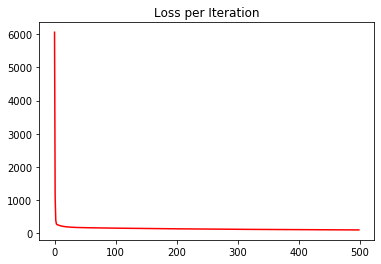

In [4]:
plt.title('Loss per Iteration')
plt.plot(range(500), loss_history, 'r-')
plt.show()

In [5]:
random_sample_indexes = np.random.choice(len(X), 10)

X_test = X[random_sample_indexes]
y_test = y[random_sample_indexes]

y_pred = lr(X_test)
display(y_pred)
display(y_test)

tensor([[22.9545],
        [19.7710],
        [26.4328],
        [22.6676],
        [28.4215],
        [15.7343],
        [25.2448],
        [19.5534],
        [24.4429],
        [32.3102]], grad_fn=<AddmmBackward>)

tensor([[22.9000],
        [30.3000],
        [22.7000],
        [14.6000],
        [36.5000],
        [19.9000],
        [22.2000],
        [36.4000],
        [ 9.7000],
        [14.4000]])